<a href="https://colab.research.google.com/github/dannywinter/2025_ML_hws/blob/main/hw4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
x_test.shape: (10000, 32, 32, 3)


<ipython-input-1-2df0db6b30f9>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"標籤: {class_name[int(y_train[i])]}")


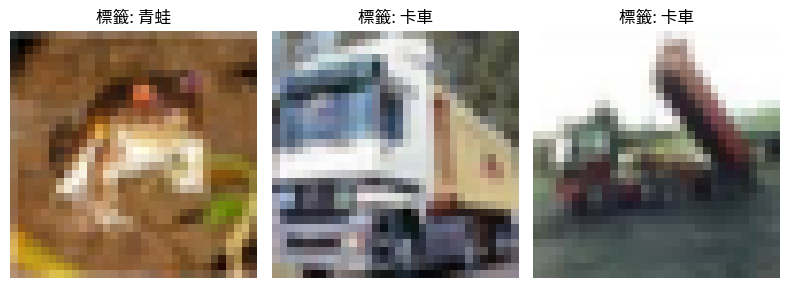

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 安裝中文字型：思源黑體（Noto Sans CJK TC）
!wget -qO /usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf

# 載入字型到 matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf')
plt.rcParams['font.family'] = 'Noto Sans CJK TC'

# 中文標籤對應
class_name = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]

# 讀取資料
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

# 正規化
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot 編碼
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 顯示前3張圖及標籤
plt.figure(figsize=(8, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"標籤: {class_name[int(y_train[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# 第一、二層卷積（Conv2D）
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # params: 16*(3*3*3+1)=448
model.add(Conv2D(16, (3, 3), activation='relu'))  # params: 16*(3*3*16+1)=2320

# 第三層：池化層
model.add(MaxPooling2D(pool_size=(2, 2)))

# 第四、五層卷積（Conv2D）
model.add(Conv2D(32, (3, 3), activation='relu'))  # params: 32*(3*3*16+1)=4640
model.add(Conv2D(32, (3, 3), activation='relu'))  # params: 32*(3*3*32+1)=9248

# 第六層：池化層
model.add(MaxPooling2D(pool_size=(2, 2)))

# 拉平與全連接輸出層
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # params: (flatten_output + 1)*10

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,666 (96.35 KB)

 Trainable params: 24,666 (96.35 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.2811 - loss: 1.9535 - val_accuracy: 0.4636 - val_loss: 1.4842
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4730 - loss: 1.4586 - val_accuracy: 0.5222 - val_loss: 1.3402
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5351 - loss: 1.3129 - val_accuracy: 0.5439 - val_loss: 1.3103
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5742 - loss: 1.2034 - val_accuracy: 0.5831 - val_loss: 1.1791
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6081 - loss: 1.1259 - val_accuracy: 0.6175 - val_loss: 1.0837
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6286 - loss: 1.0553 - val_accuracy: 0.6371 - val_loss: 1.0460
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6460 - loss: 1.0094 - val_accuracy: 0.6346 - val_loss: 1.0388
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6633 - loss: 0.9746 - val_accuracy: 0

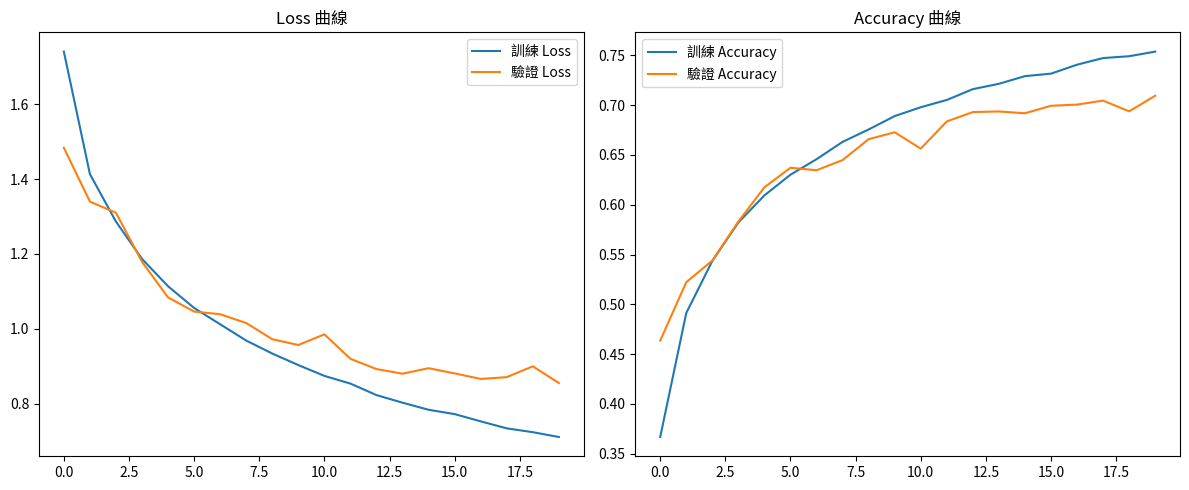

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='訓練 Loss')
plt.plot(history.history['val_loss'], label='驗證 Loss')
plt.title('Loss 曲線')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='訓練 Accuracy')
plt.plot(history.history['val_accuracy'], label='驗證 Accuracy')
plt.title('Accuracy 曲線')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"測試準確率：{test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7060 - loss: 0.8523
測試準確率：0.7054


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-11-f97fe6712c37>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true = class_name[int(y_test[i])]


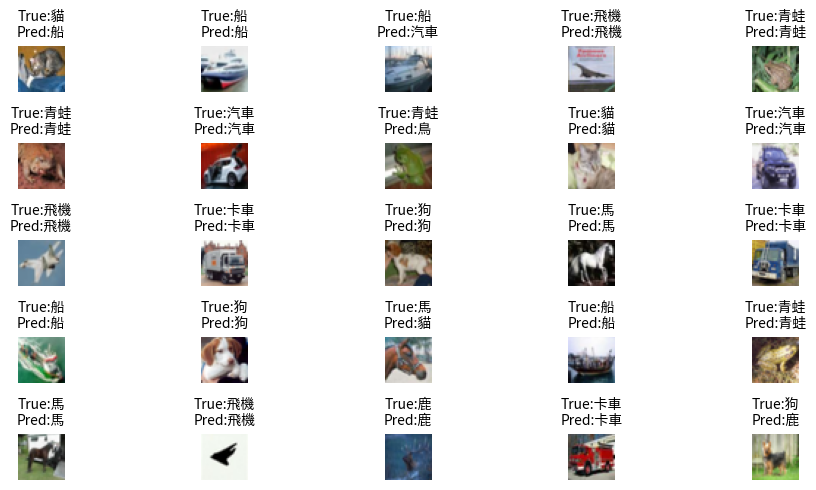

In [11]:
y_pred = model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)

plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    true = class_name[int(y_test[i])]
    pred = class_name[int(y_pred_label[i])]
    plt.title(f"True:{true}\nPred:{pred}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
# 預測機率 → 類別編號
prediction = model.predict(x_test)  # shape: (10000, 10)
predicted_labels = np.argmax(prediction, axis=1)
y_test_label = y_test.flatten()     # 若 y_test 是 (10000, 1)，轉成 (10000,)

# 混淆矩陣 (數字編碼)
conf_matrix = pd.crosstab(y_test_label,
                          predicted_labels,
                          rownames=['真實'],
                          colnames=['預測'])

# 顯示數字版本的混淆矩陣表格
print(conf_matrix)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
預測    0    1    2    3    4    5    6    7    8    9
真實                                                  
0   810   14   42    5    7    6    3    6   79   28
1    35  838    6    5    4    6    6    2   48   50
2    91    9  646   32   66   58   38   29   22    9
3    51   12  103  428   54  199   57   38   41   17
4    50    6  140   51  597   30   35   72   15    4
5    31    4   85  112   35  645   12   61   12    3
6    19    1  111   43   41   42  719    4   17    3
7    30    9   62   18   42   65    9  759    1    5
8    73   23    9    5    2    3    1    4  861   19
9    61   97    8   11    6    2    6   14   44  751


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [15]:
model.save("cnn_cifar10_model1.keras")

預測類別：鹿，實際類別：鹿


<ipython-input-16-39a0e83b356a>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true = class_name[int(y_test[idx])]


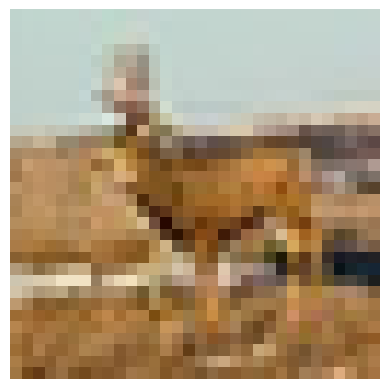

In [16]:
from ipywidgets import interact_manual

def show_predict(idx):
    img = x_test[idx]
    plt.imshow(img)
    plt.axis('off')
    pred = class_name[int(y_pred_label[idx])]
    true = class_name[int(y_test[idx])]
    print(f"預測類別：{pred}，實際類別：{true}")

#interact_manual(show_predict, idx=(0, len(x_test) - 1))
show_predict(8787)